<a href="https://colab.research.google.com/github/WuilsonEstacio/python-for-data-science/blob/main/prueba_claro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas

     |████████████████████████████████| 994 kB 8.8 MB/s 
     |████████████████████████████████| 6.6 MB 27.1 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import geopandas as gpd
import seaborn as sns
from joblib import parallel, delayed
import math as m

from datetime import datetime, timedelta
from pandas import DataFrame


In [3]:
np.random.seed(0) # semilla
# df1 = pd.read_csv('/content/london.stations.csv')
df1= gpd.read_file('/content/london.stations.csv')
print(df1.shape)
pd.set_option('display.max_columns', None)
df1.head(3)

(302, 9)


,id,latitude,longitude,name,display_name,zone,total_lines,rail,geometry
0,1,51.5028,-0.2801,Acton Town,Acton<br />Town,3,2,0,None
1,2,51.5143,-0.0755,Aldgate,NULL,1,2,0,None
2,3,51.5154,-0.0726,Aldgate East,Aldgate<br />East,1,2,0,None


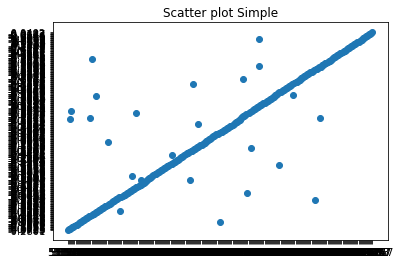

In [4]:
plt.scatter(df1.latitude,	df1.longitude)
plt.title("Scatter plot Simple");
plt.show() # En jupyter notebook no es necesario este comando

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


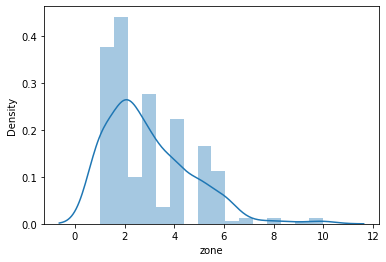

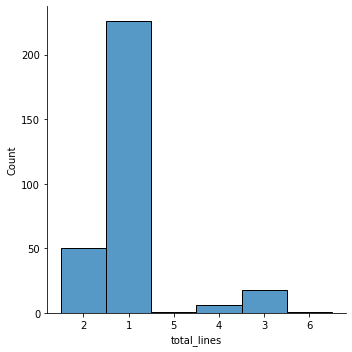

In [5]:
#  muestra las zonas y las lineas mas frecuentadas
sns.distplot(df1['zone'])
sns.displot(df1['total_lines'])

In [6]:
print(df1.info())
print('='*64)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            302 non-null    object  
 1   latitude      302 non-null    object  
 2   longitude     302 non-null    object  
 3   name          302 non-null    object  
 4   display_name  302 non-null    object  
 5   zone          302 non-null    object  
 6   total_lines   302 non-null    object  
 7   rail          302 non-null    object  
 8   geometry      0 non-null      geometry
dtypes: geometry(1), object(8)
memory usage: 21.4+ KB
None


In [7]:
# para ver que tipo de variables tiene las columnas
categori_columna_x=df1.zone.unique()
categori_columna_x

array(['3', '1', '2', '4', '2.5', '5', '3.5', '1.5', '6', '5.5', '6.5',
       '10', '9', '8', '7'], dtype=object)

In [8]:
# analizamos donde esta la mayor cantidad de zonas en nuestra base de datos
M_inueble=df1["zone"].value_counts()
print(M_inueble)

2      75
1      60
3      47
4      38
5      28
6      18
2.5    17
3.5     6
1.5     4
7       2
10      2
8       2
6.5     1
5.5     1
9       1
Name: zone, dtype: int64


1    226
2     50
3     18
4      6
5      1
6      1
Name: total_lines, dtype: int64


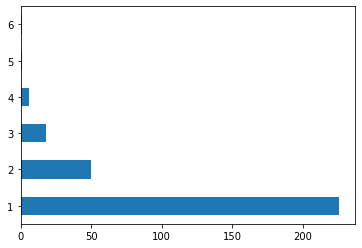

In [37]:
# analizamos donde esta la mayor cantidad de lineas en nuestra base de datos
M_inueble=df1["total_lines"].value_counts()
print(M_inueble)

In [10]:
df2 = pd.read_csv('/content/london.lines.csv')
print(df2.shape)
df2.head(3)

(13, 4)


,line,name,colour,stripe
0,1,Bakerloo Line,AE6017,NaN
1,3,Circle Line,FFE02B,NaN
2,6,Hammersmith & City Line,F491A8,NaN


In [11]:
# para ver que tipo de variables tiene las columnas
categori_columna_x=df2.name.unique()
categori_columna_x

array(['Bakerloo Line', 'Circle Line', 'Hammersmith & City Line',
       'Jubilee Line', 'Victoria Line', 'Central Line', 'District Line',
       'East London Line', 'Metropolitan Line', 'Northern Line',
       'Piccadilly Line', 'Waterloo & City Line',
       'Docklands Light Railway'], dtype=object)

In [12]:
print(df2.info())
print('='*64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   line    13 non-null     int64 
 1   name    13 non-null     object
 2   colour  13 non-null     object
 3   stripe  1 non-null      object
dtypes: int64(1), object(3)
memory usage: 544.0+ bytes
None


In [103]:
df3 = pd.read_csv('/content/london.connections.csv')
print(df3.shape)
df3

(406, 4)


,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2
...,...,...,...,...
401,198,272,11,1
402,198,273,11,3
403,224,260,11,3
404,245,272,11,3


In [14]:
df3.isnull().sum().sort_values(ascending=False,)[:21]

time        0
line        0
station2    0
station1    0
dtype: int64

In [15]:
print(df3.info())
print('='*64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   station1  406 non-null    int64
 1   station2  406 non-null    int64
 2   line      406 non-null    int64
 3   time      406 non-null    int64
dtypes: int64(4)
memory usage: 12.8 KB
None


In [105]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
station1,406.0,100.623153,73.389664,1.0,38.25,89.0,151.00,299.0
station2,406.0,198.009852,73.235456,1.0,145.00,206.0,263.75,303.0
line,406.0,6.613300,3.598452,1.0,4.00,7.0,9.75,13.0
time,406.0,2.293103,0.894594,1.0,2.00,2.0,3.00,8.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


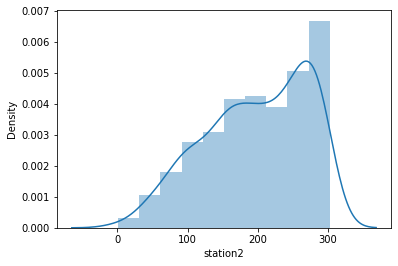

In [17]:
sns.distplot(df3['station2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


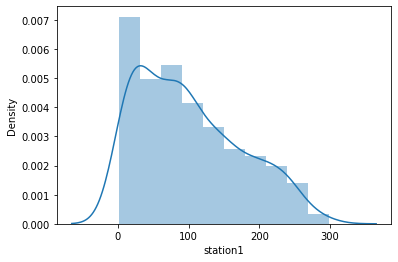

In [18]:
sns.distplot(df3['station1'])

In [19]:
# analizamos cual es la linea mas frecuentada, aqui vemos que es la linea 9
M_inueble=df3["line"].value_counts(ascending=True)
print(M_inueble)

12     1
5      8
11    15
1     24
7     26
3     27
6     27
8     33
13    34
2     49
9     51
10    52
4     59
Name: line, dtype: int64


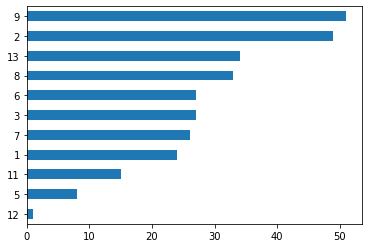

In [40]:
Estrato=df3["line"].value_counts(ascending=True)
estrato_IMPORTANTES=Estrato[:11]
estrato_IMPORTANTES.plot.barh()

11     10
13      6
14      6
90      6
87      6
74      6
107     5
89      5
49      4
200     4
192     4
Name: station1, dtype: int64


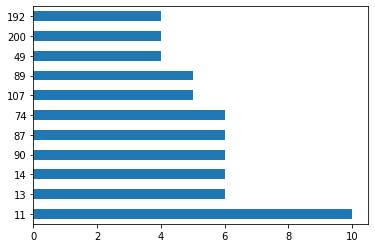

In [77]:
# estacion mas frecuentada aqui, vemos que es la 11
station1=df3["station1"].value_counts()
station1_IMPORTANTES=station1[:11]
print(station1_IMPORTANTES)
station1_IMPORTANTES.plot.barh()

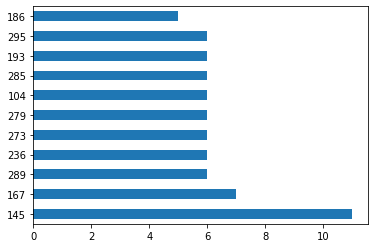

In [85]:
# estacion mas frecuentada aqui, vemos que es la 145
station2=df3["station2"].value_counts()
station2_IMPORTANTES=station2[:11]
# plt.figure(figsize=(5,3))
# plt.title('Indicador estrato social')
# plt.xlabel('Numero de inmuebles')
# plt.ylabel('Estrato')
station2_IMPORTANTES.plot.barh()

In [45]:
# esto nos agrupa por estados y nos da una descripcion de las lineas por estacio
#  en la parte  de max y min se puede interpretar como edad maxima  y minima de los policias fallecidos por estado..
data_por_area1=df3.groupby(by = 'station1')['line'].describe() # mean(), max(), count(), describe()
data_por_area1

,count,mean,std,min,25%,50%,75%,max
station1,,,,,,,,
1,3.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
2,3.0,4.666667,2.886751,3.0,3.0,3.0,5.5,8.0
3,4.0,5.000000,1.154701,4.0,4.0,5.0,6.0,6.0
4,2.0,13.000000,0.000000,13.0,13.0,13.0,13.0,13.0
5,2.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...
267,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
279,1.0,7.000000,NaN,7.0,7.0,7.0,7.0,7.0
284,1.0,13.000000,NaN,13.0,13.0,13.0,13.0,13.0


In [23]:
#  nos agrupa por estaciones y nos da una descripcion del tiempo entre estaciones
time_station=df3.groupby(by = ['station1','station2'])['time'].describe() # mean(), max(), count(), describe()
time_station
pd.set_option('display.max_columns', None)
time_station.head(30)
# station1	station2	time
# nos da una descripcion de el tiempo entre las estaciones 1 y 2

count  mean  std  min  25%  50%  75%  max
station1 station2                                           
1        73          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         234         1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
         265         1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
2        156         2.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
         263         1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
3        156         1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
         263         1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         295         2.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
4        70          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         201         1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
5        194         1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
         252         1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
6        46          1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
7        145         1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         188         1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
8        124         1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
         264         1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
9        31          1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
         232         1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
10       95          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         128         1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
11       28          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         83          2.0   3.0  0.0  3.0  3.0  3.0  3.0  3.0
         94          1.0   6.0  NaN  6.0  6.0  6.0  6.0  6.0
         104         3.0   3.0  0.0  3.0  3.0  3.0  3.0  3.0
         163         1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
         212         1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         249         1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
12       56          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         257         1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0

In [76]:
dfm=df3[df3['station1']==1]
dfm

,station1,station2,line,time
338,1,73,10,2
339,1,234,10,4
340,1,265,10,3


In [73]:
#  nos agrupa por estaciones y nos da una descripcion del tiempo entre estaciones
time=df3.groupby(by = ['station2','station1'])['time'].describe() # mean(), max(), count(), describe()
time
pd.set_option('display.max_columns', None)
time.head(30)
# station1	station2	time
# nos da una descripcion de el tiempo entre las estaciones 1 y 2

count  mean  std  min  25%  50%  75%  max
station2 station1                                           
1        52          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         73          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
28       11          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
31       9           1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
36       33          2.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
41       23          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
42       41          1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
46       6           1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
47       22          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         40          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
50       46          1.0   8.0  NaN  8.0  8.0  8.0  8.0  8.0
53       46          1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
55       54          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
56       12          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         54          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
58       38          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
65       20          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
67       21          1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
         66          1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
70       4           1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         32          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
73       1           1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         72          1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
74       17          1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
78       15          2.0   4.0  0.0  4.0  4.0  4.0  4.0  4.0
79       27          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
         43          1.0   2.0  NaN  2.0  2.0  2.0  2.0  2.0
81       38          1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
83       11          2.0   3.0  0.0  3.0  3.0  3.0  3.0  3.0
84       29          1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0

In [75]:
# para comprobacion datos
dfd=df3[df3['station2']==1]
dfd

,station1,station2,line,time
117,52,1,4,2
122,73,1,4,2


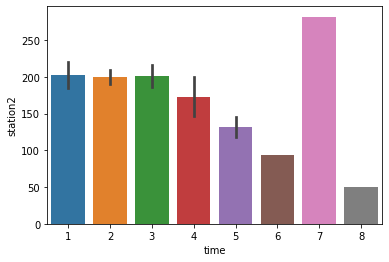

In [25]:
# plt = sns.barplot(x=df3.time, y=df3.station2)
# # plt.set(xlabel = 'Dias de la semana', ylabel ='NUmero de Vuelos')

In [114]:
import pandas as pd
import numpy as np
import networkx as nx

In [116]:
df3 = pd.read_csv('/content/london.connections.csv')
print(df3.shape)
df3.head(2)

(406, 4)


,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2


In [117]:
Metro = nx.from_pandas_edgelist(df3, source='station1', target='station2', edge_attr='time')

In [118]:
Metro.nodes()

NodeView((11, 163, 212, 49, 87, 197, 82, 193, 84, 148, 279, 113, 246, 298, 114, 140, 137, 206, 237, 143, 159, 278, 185, 281, 192, 13, 156, 250, 16, 91, 173, 24, 164, 28, 162, 37, 158, 301, 48, 126, 51, 103, 215, 68, 256, 72, 286, 76, 181, 296, 88, 109, 98, 211, 105, 177, 196, 112, 259, 127, 186, 226, 149, 208, 153, 154, 247, 230, 275, 239, 221, 294, 241, 2, 263, 83, 104, 14, 92, 167, 18, 25, 161, 255, 44, 166, 285, 90, 145, 99, 122, 236, 229, 273, 248, 3, 295, 15, 78, 269, 17, 110, 293, 21, 67, 33, 36, 289, 52, 1, 265, 66, 85, 73, 74, 138, 287, 270, 80, 205, 231, 129, 96, 195, 108, 141, 209, 268, 213, 244, 200, 242, 300, 267, 299, 4, 70, 201, 225, 19, 97, 20, 65, 217, 27, 79, 32, 204, 42, 120, 292, 43, 219, 61, 171, 238, 63, 203, 64, 106, 135, 69, 86, 152, 155, 284, 262, 41, 216, 253, 174, 175, 276, 228, 101, 227, 147, 150, 283, 218, 249, 23, 157, 107, 183, 45, 207, 243, 71, 172, 297, 94, 254, 290, 142, 144, 282, 233, 6, 46, 50, 53, 214, 62, 168, 280, 75, 210, 222, 115, 178, 184, 291, 

In [119]:
Metro.edges()

EdgeView([(11, 163), (11, 212), (11, 83), (11, 104), (11, 28), (11, 249), (11, 94), (163, 82), (212, 192), (49, 87), (49, 197), (49, 151), (87, 279), (87, 255), (87, 285), (197, 192), (197, 107), (197, 151), (82, 193), (193, 278), (193, 18), (193, 83), (193, 218), (84, 148), (84, 29), (84, 136), (148, 279), (279, 233), (279, 285), (279, 136), (279, 13), (113, 246), (113, 298), (246, 281), (298, 137), (114, 140), (140, 237), (137, 206), (206, 143), (237, 185), (143, 159), (159, 278), (185, 281), (192, 28), (192, 259), (192, 107), (192, 277), (13, 156), (13, 250), (13, 225), (13, 157), (13, 167), (156, 24), (156, 2), (156, 167), (156, 3), (250, 48), (16, 91), (16, 173), (91, 109), (173, 98), (24, 164), (164, 247), (164, 33), (164, 244), (28, 162), (28, 107), (162, 149), (37, 158), (37, 301), (158, 68), (301, 215), (301, 241), (48, 126), (126, 259), (126, 60), (126, 223), (51, 103), (51, 215), (103, 109), (68, 256), (256, 88), (72, 286), (72, 73), (286, 181), (76, 181), (76, 296), (181, 1

In [120]:
Metro.order() # cantidad de vertices

302

In [141]:
# estaciones que pertenecen a mas de una linea
for x in Metro.nodes():
  if Metro.degree(x)>4: # grado mayor a 2 osi su grado es igual a 2 solo tien 2 vecinoss
    print(x)

11
193
279
192
13
156
145
265
74
225
107


In [134]:
# para ver la ruta mas cercana entre rutas en este caso entre la estacion 11 y la estacion 197
djk_path = nx.dijkstra_path(Metro, source=11, target=197, weight=True)
djk_path

[11, 212, 192, 197]

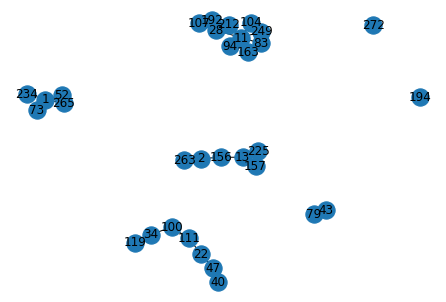

In [150]:
# podemos ir biendo las agrupaciones para ciertas rutas.
ruta1=Metro.subgraph([1,194,11,34, 119,100,34,
192,13,156,157,225,47, 40, 22, 111,
52,73,234,265,
2,156,263,
79,
272,43,
11,28,83,94,104,163,212,249,
107])
nx.draw(ruta1,with_labels=True)

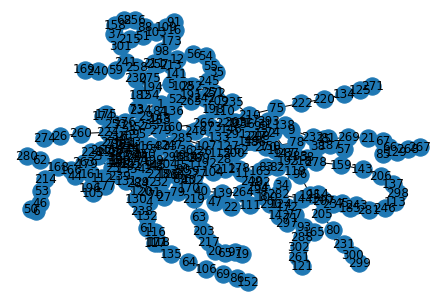

In [188]:
# intento numero 23
import networkx as nx  

# station1=df3["station1"].value_counts()
# station2=df3["station2"].value_counts()
# s1=np.array(station1)
# s2=np.array(station2)
G=nx.Graph() #Cree una imagen vacía sin nada, el nombre de la imagen es G
# step2: Borde la imagen vacía anterior
G.add_edges_from(Metro.edges) # Aquí solo se agrega un borde, el punto de inicio del borde es 1 y el punto final es 2
G.add_nodes_from(Metro.nodes)
nx.draw(G,with_labels=True) 
# nx.draw () es una declaración de dibujo, with_labels = True significa mostrar el nombre del nodo en el gráfico

import matplotlib.pyplot as plt # Dibuje imágenes y fotos que muestren paquetes y oraciones
plt.show()

Name: 
Type: Graph
Number of nodes: 302
Number of edges: 349
Average degree:   2.3113


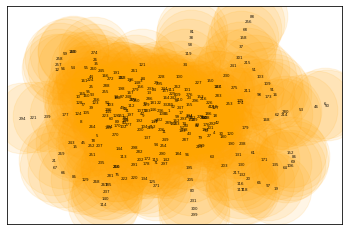

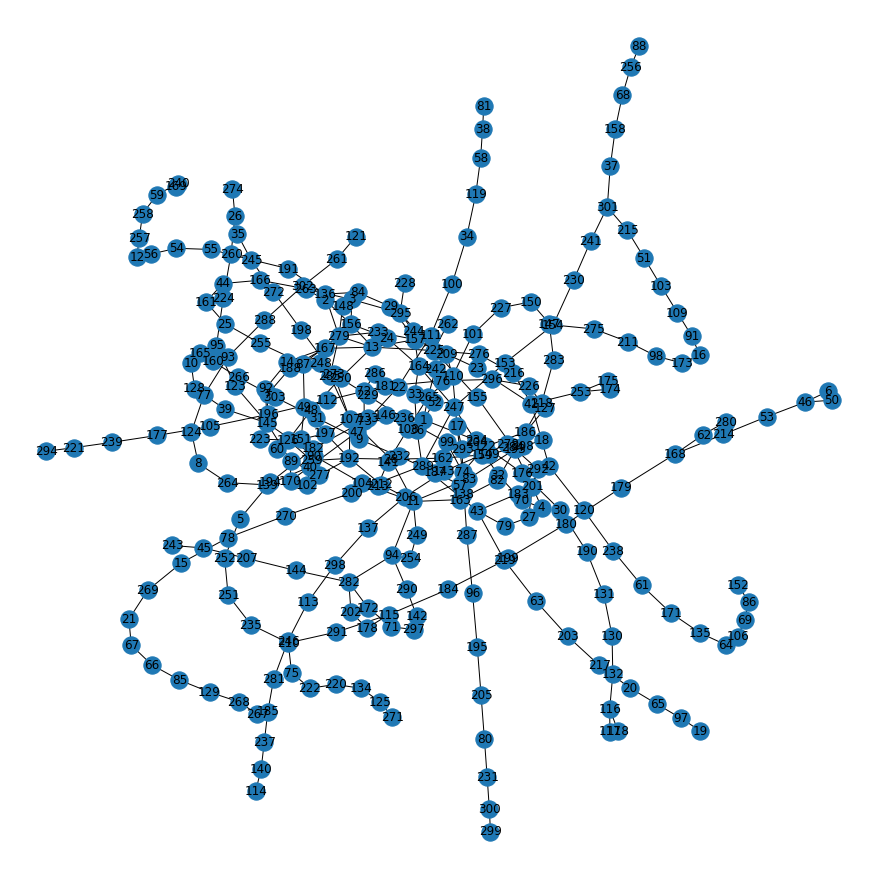

In [182]:
import networkx as nx

tuplas = df3.values.tolist()
# Se crea un grafo vacío
G = nx.Graph()
# station1=df3["station1"].value_counts()
# station2=df3["station2"].value_counts()
s1=np.array(df3.station1)
s2=np.array(df3.station2)
# plt.figure(1,figsize=(13,13))
G.add_nodes_from(Metro.nodes())
G.add_edges_from(Metro.edges())
print(nx.info(G)) # Se muestra información sobre el grafo
graph_pos = nx.spring_layout(G) # Posición del grafo
# Se muestra por pantalla la representación final del grafo
nx.draw_networkx_nodes(G,graph_pos,node_size=5000,node_color='orange',alpha=0.1)
nx.draw_networkx_labels(G,graph_pos,alpha=0.9,font_size=4)
plt.figure(3,figsize=(12,12))
nx.draw(G,graph_pos,with_labels=True)
plt.savefig("Metro Matplotlib1.png")